Analyse des données

Notion preliminaire

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,f1_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler

In [4]:
t=np.linspace(0,5,20)
t

array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [5]:
x=np.sin(t**2)

<function matplotlib.pyplot.show(close=None, block=None)>

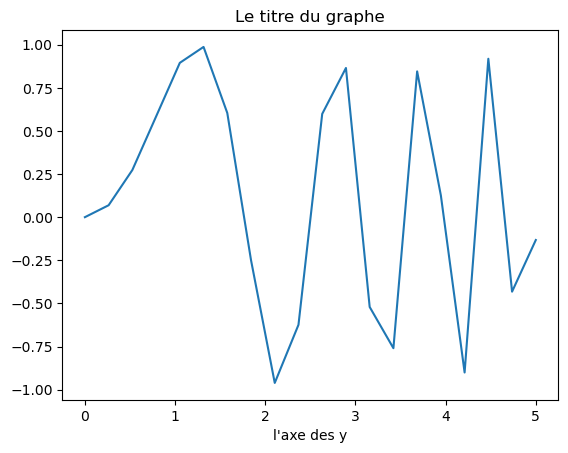

In [6]:
plt.plot(t,x)
plt.xlabel("L'axe des x")
plt.xlabel("l'axe des y")
plt.title("Le titre du graphe")
plt.show

In [7]:
data=pd.read_csv("data_titanic.csv")

In [8]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
data.shape

(891, 12)

In [10]:
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
data["Pclass"]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [13]:
data["Parch"]

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

In [14]:
data["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [15]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
data.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
data.duplicated

<bound method DataFrame.duplicated of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                             

In [20]:
data["Age"].isnull().sum()

177

In [21]:
data["Age"].fillna(data["Age"].mean(),inplace=True)

In [22]:
data["Age"].isnull().sum()

0

In [23]:
data["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [24]:
data["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [25]:
#data["Cabin"].fillna(data["Cabin"].mean,inplace=True)

In [26]:
data["Sex"]=data["Sex"].map({"male":"homme","female":"femme"})

In [27]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",homme,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",femme,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",femme,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",femme,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",homme,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",homme,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",femme,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",femme,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",homme,26.000000,0,0,111369,30.0000,C148,C


In [28]:
dictionnaire=dict({"female":0,"male":1})

In [29]:
dictionnaire.keys()

dict_keys(['female', 'male'])

In [30]:
dictionnaire.values()

dict_values([0, 1])

In [31]:
data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",femme,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",femme,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",homme,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",femme,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",femme,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",femme,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",homme,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",femme,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",femme,19.0,0,0,112053,30.0000,B42,S


In [32]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
data=data.dropna()

In [34]:
data.isnull().sum() #

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

visualisation

In [35]:
#la different des hommes et femmes

<Figure size 1000x900 with 0 Axes>

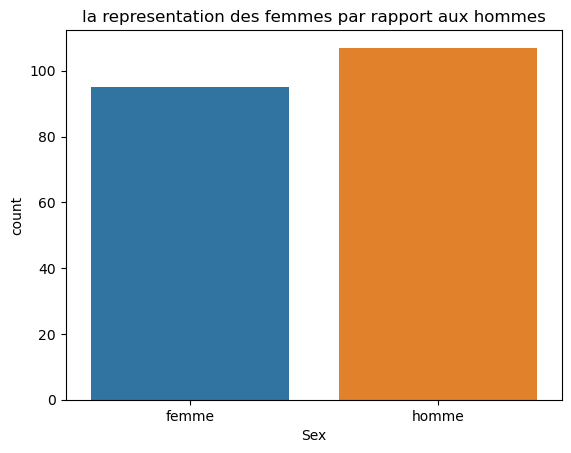

<Figure size 1000x900 with 0 Axes>

In [36]:
sn.countplot(x="Sex",data=data)
plt.title("la representation des femmes par rapport aux hommes")
plt.figure(figsize=(10,9))

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Age')

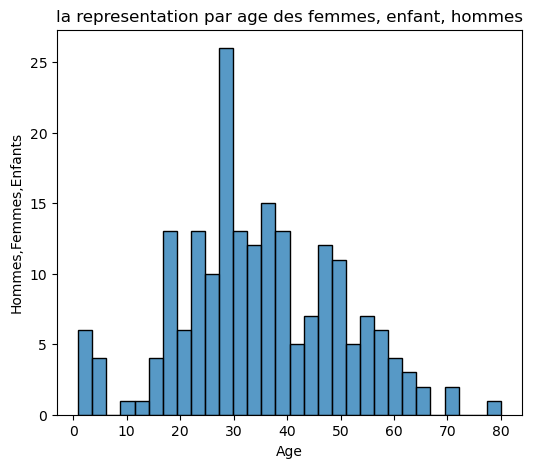

In [37]:
plt.figure(figsize=(6,5))
sn.histplot(data=data, x="Age", bins=30, multiple="stack")
plt.title("la representation par age des femmes, enfant, hommes")
plt.ylabel("Hommes,Femmes,Enfants")
plt.xlabel("Age")


C:\Users\armel\AppData\Local\Temp\ipykernel_11840\703388579.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.barplot(x="Pclass", y="Fare", data=data, ci=None)


Text(0.5, 1.0, "classe qui a fait entrer beaucup d'argent")

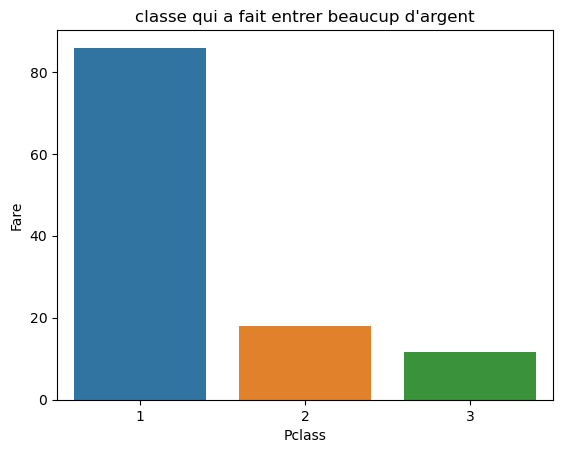

In [38]:
sn.barplot(x="Pclass", y="Fare", data=data, ci=None)
plt.title("classe qui a fait entrer beaucup d'argent")

C:\Users\armel\AppData\Local\Temp\ipykernel_11840\2939748655.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.barplot(x="Pclass", y="Survived",hue="Sex", data=data, ci=None)


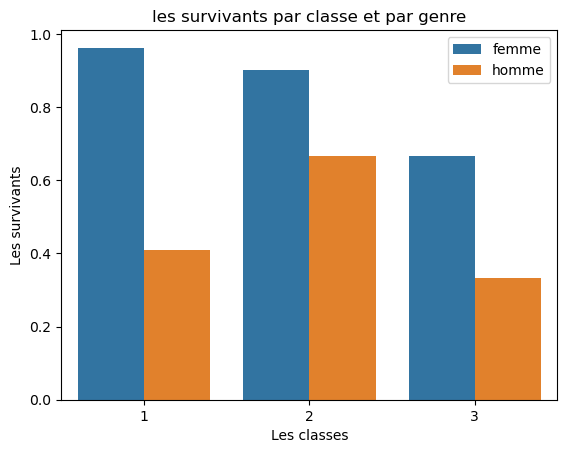

In [39]:
sn.barplot(x="Pclass", y="Survived",hue="Sex", data=data, ci=None)
plt.title("les survivants par classe et par genre")
plt.ylabel("Les survivants")
plt.xlabel("Les classes")
plt.legend(loc="upper right")

C:\Users\armel\AppData\Local\Temp\ipykernel_11840\1042670056.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.barplot(x="Pclass", y="Fare",hue="Sex", data=data, ci=None)


Text(0.5, 0, 'classe')

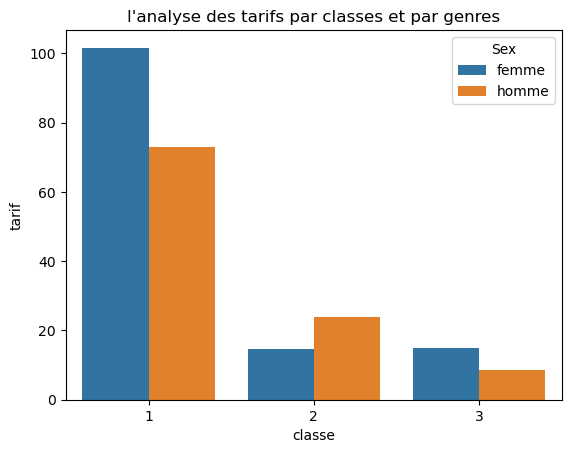

In [40]:
sn.barplot(x="Pclass", y="Fare",hue="Sex", data=data, ci=None)
plt.title("l'analyse des tarifs par classes et par genres")
plt.ylabel("tarif")
plt.xlabel("classe")

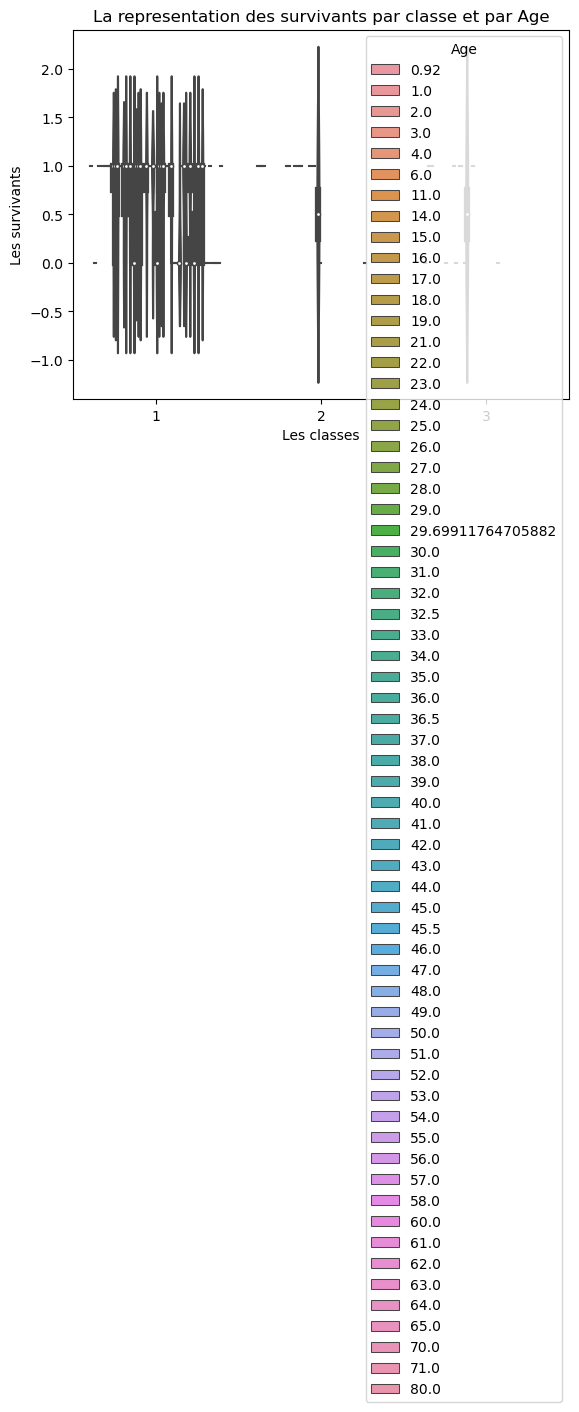

In [41]:

sn.violinplot( x=data["Pclass"],y=data["Survived"], hue=data["Age"])
plt.title("La representation des survivants par classe et par Age")
plt.xlabel("Les classes")
plt.ylabel("Les survivants")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'la representation des survivants par classe et par sexe')

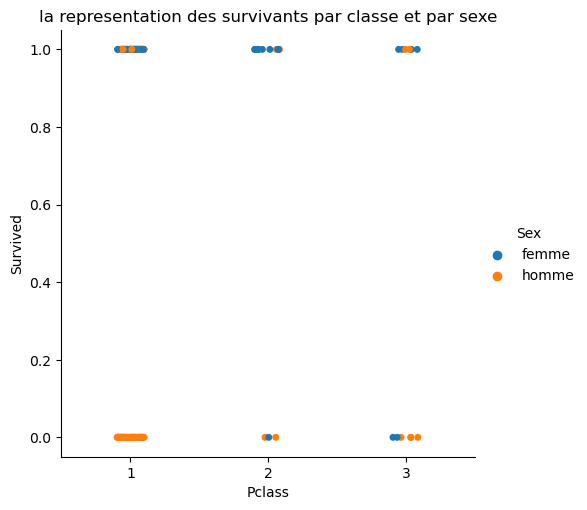

In [42]:

sn.catplot(x="Pclass", y="Survived", hue="Sex", data=data)
plt.title("la representation des survivants par classe et par sexe")

C:\Users\armel\AppData\Local\Temp\ipykernel_11840\499852474.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.barplot(x="Embarked", y="Survived", hue="Sex", data=data, ci=None)


Text(0, 0.5, 'Survivant')

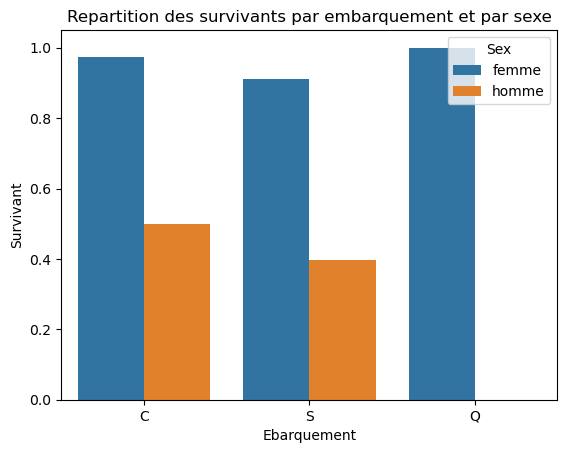

In [43]:

sn.barplot(x="Embarked", y="Survived", hue="Sex", data=data, ci=None)
plt.title("Repartition des survivants par embarquement et par sexe")
plt.xlabel("Ebarquement")
plt.ylabel("Survivant")

Text(0.5, 1.0, 'representation du tarif et le nombre des membre de famille ')

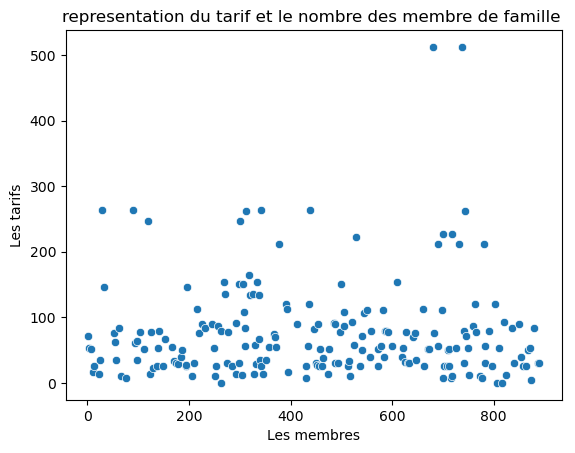

In [44]:

sn.scatterplot(x="PassengerId",y="Fare", data=data)
plt.xlabel("Les membres")
plt.ylabel("Les tarifs")
plt.title("representation du tarif et le nombre des membre de famille ")

In [45]:
data["FamillySize"]=data["SibSp"]+data["Parch"]+1

C:\Users\armel\AppData\Local\Temp\ipykernel_11840\1600697947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["FamillySize"]=data["SibSp"]+data["Parch"]+1


In [46]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamillySize
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",femme,38.0,1,0,PC 17599,71.2833,C85,C,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",femme,35.0,1,0,113803,53.1000,C123,S,2
6,7,0,1,"McCarthy, Mr. Timothy J",homme,54.0,0,0,17463,51.8625,E46,S,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",femme,4.0,1,1,PP 9549,16.7000,G6,S,3
11,12,1,1,"Bonnell, Miss. Elizabeth",femme,58.0,0,0,113783,26.5500,C103,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",femme,47.0,1,1,11751,52.5542,D35,S,3
872,873,0,1,"Carlsson, Mr. Frans Olof",homme,33.0,0,0,695,5.0000,B51 B53 B55,S,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",femme,56.0,0,1,11767,83.1583,C50,C,2
887,888,1,1,"Graham, Miss. Margaret Edith",femme,19.0,0,0,112053,30.0000,B42,S,1


In [47]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamillySize'],
      dtype='object')

Text(0.5, 1.0, 'representation du tarif et le nombre des membre de famille ')

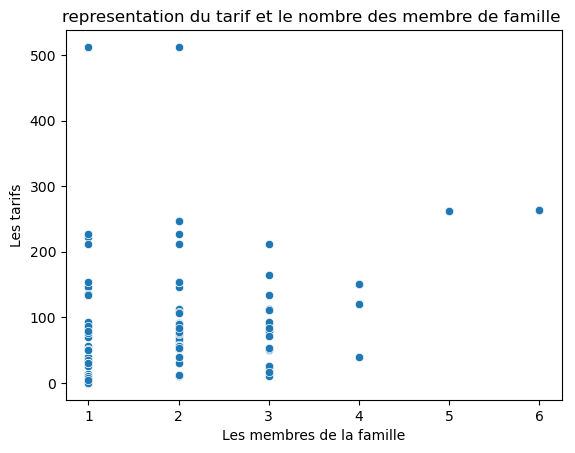

In [48]:
sn.scatterplot(x="FamillySize",y="Fare", data=data)
plt.xlabel("Les membres de la famille")
plt.ylabel("Les tarifs")
plt.title("representation du tarif et le nombre des membre de famille ")

Apprentissage automatique

In [49]:
data["Sex"]=data["Sex"].map({"homme":1,"femme":0})

C:\Users\armel\AppData\Local\Temp\ipykernel_11840\2975577950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sex"]=data["Sex"].map({"homme":1,"femme":0})


In [50]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamillySize
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S,3
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",0,47.0,1,1,11751,52.5542,D35,S,3
872,873,0,1,"Carlsson, Mr. Frans Olof",1,33.0,0,0,695,5.0000,B51 B53 B55,S,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,11767,83.1583,C50,C,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,1


In [51]:
features=["Pclass","Sex","Age","SibSp","Parch","Fare"]
Target=["Survived"]

In [52]:
X=data[features]
y=data[Target]

In [53]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [54]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare
879,1,0,56.000000,0,1,83.1583
195,1,0,58.000000,0,0,146.5208
128,3,0,29.699118,1,1,22.3583
540,1,0,36.000000,0,2,71.0000
871,1,0,47.000000,1,1,52.5542
...,...,...,...,...,...,...
484,1,1,25.000000,1,0,91.0792
75,3,1,25.000000,0,0,7.6500
430,1,1,28.000000,0,0,26.5500
779,1,0,43.000000,0,1,211.3375


In [55]:
Y_train

,Survived
879,1
195,1
128,1
540,1
871,1
...,...
484,1
75,0
430,1
779,1


In [56]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare
438,1,1,64.000000,1,4,263.0000
88,1,0,23.000000,3,2,263.0000
166,1,0,29.699118,0,1,55.0000
710,1,0,24.000000,0,0,49.5042
809,1,0,33.000000,1,0,53.1000
515,1,1,47.000000,0,0,34.0208
319,1,0,40.000000,1,1,134.5000
748,1,1,19.000000,1,0,53.1000
712,1,1,48.000000,1,0,52.0000
245,1,1,44.000000,2,0,90.0000


In [57]:
Y_test

,Survived
438,0
88,1
166,1
710,1
809,1
515,0
319,1
748,0
712,1
245,0


In [58]:
model=LogisticRegression()

In [59]:
model.fit(X_train,Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_predict=model.predict(X_test)

In [61]:
y_predict

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1],
      dtype=int64)

In [62]:
Y_test

,Survived
438,0
88,1
166,1
710,1
809,1
515,0
319,1
748,0
712,1
245,0


In [63]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare
438,1,1,64.000000,1,4,263.0000
88,1,0,23.000000,3,2,263.0000
166,1,0,29.699118,0,1,55.0000
710,1,0,24.000000,0,0,49.5042
809,1,0,33.000000,1,0,53.1000
515,1,1,47.000000,0,0,34.0208
319,1,0,40.000000,1,1,134.5000
748,1,1,19.000000,1,0,53.1000
712,1,1,48.000000,1,0,52.0000
245,1,1,44.000000,2,0,90.0000


In [64]:
accuracy=accuracy_score(Y_test,y_predict)

In [65]:
print(f"La precision du modele :{round(accuracy*100,2)}%")

La precision du modele :80.49%


In [66]:
Y_prob=model.predict_proba(X_test)[:,1]

In [67]:
Y_prob

array([0.13927749, 0.95129608, 0.88383335, 0.92405851, 0.92960898,
       0.38022991, 0.88978539, 0.65861227, 0.45647664, 0.57119683,
       0.9245152 , 0.40427359, 0.91581845, 0.59578819, 0.85889643,
       0.93329127, 0.5014733 , 0.57781962, 0.90464868, 0.84631812,
       0.8954842 , 0.47117812, 0.57076454, 0.44247597, 0.91118824,
       0.50169145, 0.92432745, 0.94136917, 0.89154157, 0.93023733,
       0.8934576 , 0.47451287, 0.84882442, 0.59219122, 0.87665935,
       0.88859683, 0.8869789 , 0.49939849, 0.6053372 , 0.88369535,
       0.94995041])

In [68]:
f1=f1_score(Y_test,y_predict)

In [69]:
print(f"La precision du modele :{round(f1*100,2)}%")

La precision du modele :87.88%


In [70]:
confusion=confusion_matrix(Y_test,y_predict)

In [71]:
confusion

array([[ 4,  4],
       [ 4, 29]], dtype=int64)

In [72]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_prob)
auc=roc_auc_score(Y_test,Y_prob)

In [73]:
print(f"AUC :{round(auc*100,2)}%")

AUC :89.02%


In [74]:
rapport=classification_report(Y_test,y_predict)

In [75]:
print(rapport)

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.88      0.88      0.88        33

    accuracy                           0.80        41
   macro avg       0.69      0.69      0.69        41
weighted avg       0.80      0.80      0.80        41



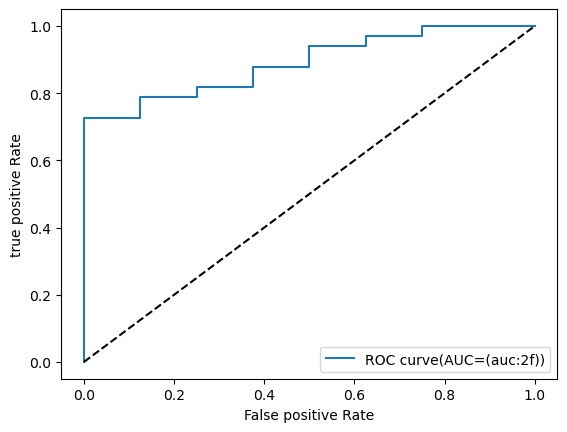

In [76]:

plt.plot(fpr,tpr,label=f'ROC curve(AUC=(auc:2f))')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False positive Rate")
plt.ylabel("true positive Rate")
plt.legend(loc="lower right")
plt.show()


In [77]:
#foret aleatoire
model=RandomForestClassifier(n_estimators=100,random_state=42)

In [78]:
model.fit(X_train,Y_train)

C:\Users\armel\AppData\Local\Temp\ipykernel_11840\4153405994.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


RandomForestClassifier(random_state=42)

In [79]:
y2_predict=model.predict(X_test)

In [80]:
y_predict

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1],
      dtype=int64)

In [81]:
accurancy=accuracy_score(Y_test,y2_predict)

In [82]:
print(f'La precision du modele :{round(accurancy*100,1)}%')

La precision du modele :78.0%


In [83]:
rapport=classification_report(Y_test,y2_predict)

In [84]:
print(rapport)

              precision    recall  f1-score   support

           0       0.43      0.38      0.40         8
           1       0.85      0.88      0.87        33

    accuracy                           0.78        41
   macro avg       0.64      0.63      0.63        41
weighted avg       0.77      0.78      0.77        41



In [85]:
Y_prob=model.predict_proba(X_test)[:,1]

In [86]:
Y_prob

array([0.32, 0.73, 0.96, 0.96, 0.99, 0.09, 0.99, 0.46, 0.55, 0.68, 0.95,
       0.37, 0.91, 0.92, 0.88, 0.92, 0.6 , 0.41, 0.97, 0.69, 0.78, 0.52,
       0.88, 0.7 , 0.97, 0.85, 0.98, 0.8 , 0.95, 0.94, 0.98, 0.24, 0.9 ,
       0.52, 0.9 , 1.  , 0.95, 0.39, 0.64, 0.98, 0.63])

In [87]:
#Arbre de decisions

In [88]:
decision=DecisionTreeClassifier(random_state=42)

In [89]:
decision.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [90]:
y3_predict=decision.predict(X_test)

In [91]:
y3_predict

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
      dtype=int64)

In [92]:
accurancy=accuracy_score(Y_test,y3_predict)

In [93]:
print(f'La precision du modele :{round(accurancy*100,1)}%')

La precision du modele :82.9%


In [94]:
rapport=classification_report(Y_test,y3_predict)
print(rapport)

              precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.86      0.94      0.90        33

    accuracy                           0.83        41
   macro avg       0.73      0.66      0.68        41
weighted avg       0.81      0.83      0.81        41



In [95]:
Y_proba=decision.predict_proba(X_test)[:,1]
Y_proba

array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1.])

In [96]:
confusion=confusion_matrix(Y_test,y3_predict)
confusion

array([[ 3,  5],
       [ 2, 31]], dtype=int64)

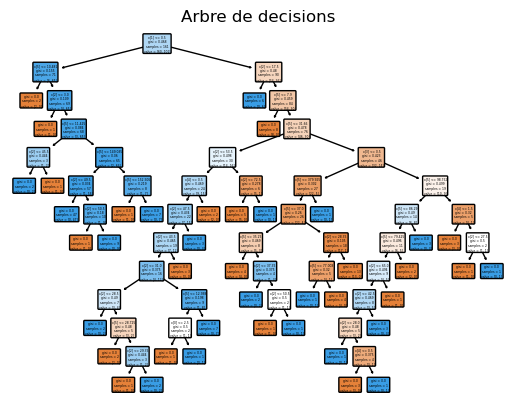

In [97]:
tree.plot_tree(decision, rounded=True, filled=True)
plt.title("Arbre de decisions")
plt.show()

In [98]:
#KMeans


In [99]:
x,y=make_blobs(n_samples=202,centers=4,cluster_std=0.60, random_state=0)

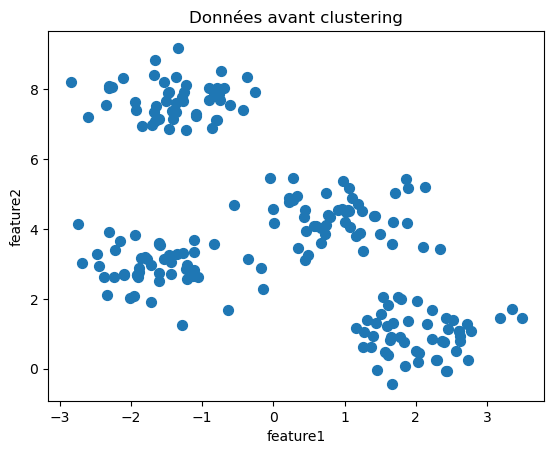

In [100]:
plt.scatter(x[:,0],x[:,1] ,s=50)
plt.title("Données avant clustering")
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()

In [101]:
kmeans=KMeans(n_clusters=4)

In [102]:
kmeans.fit(x)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [103]:
centers=kmeans.cluster_centers_

In [104]:
centers

array([[ 2.06293158,  0.95788743],
       [ 0.93190228,  4.37350964],
       [-1.37472707,  7.70985923],
       [-1.63157453,  2.92435213]])

In [105]:
y_kmeans=kmeans.predict(x)
y_kmeans

array([1, 3, 2, 3, 0, 3, 0, 1, 1, 0, 1, 3, 1, 0, 3, 0, 2, 0, 0, 2, 1, 1,
       2, 3, 0, 1, 2, 2, 1, 2, 1, 2, 0, 3, 2, 2, 1, 1, 3, 1, 0, 0, 1, 3,
       2, 1, 1, 3, 1, 3, 1, 1, 0, 2, 2, 2, 3, 2, 3, 3, 2, 0, 2, 1, 3, 3,
       0, 0, 1, 1, 3, 2, 1, 0, 0, 2, 0, 2, 0, 2, 1, 1, 3, 2, 3, 2, 0, 3,
       3, 2, 1, 0, 0, 2, 2, 1, 1, 3, 3, 3, 2, 3, 2, 1, 1, 2, 0, 3, 2, 1,
       3, 1, 0, 2, 0, 0, 2, 2, 2, 3, 2, 1, 0, 0, 1, 2, 1, 3, 0, 1, 3, 2,
       2, 0, 1, 1, 3, 0, 1, 3, 0, 3, 0, 1, 3, 2, 2, 0, 3, 0, 3, 3, 0, 0,
       3, 0, 1, 0, 3, 2, 2, 2, 2, 1, 3, 0, 1, 2, 3, 3, 0, 2, 0, 0, 3, 3,
       2, 1, 0, 0, 3, 0, 1, 3, 3, 2, 2, 1, 1, 0, 1, 3, 0, 1, 0, 1, 3, 3,
       2, 1, 0, 0])

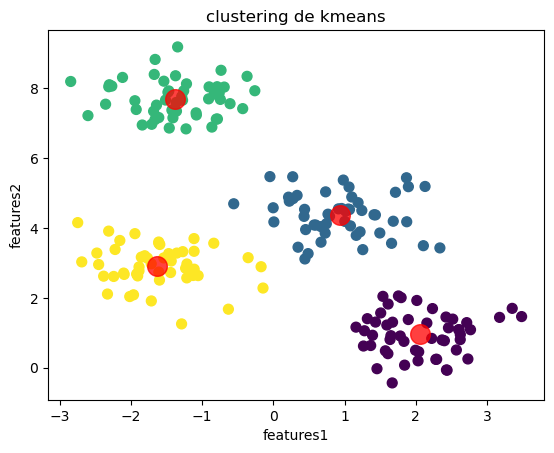

In [106]:
plt.scatter(x[:,0],x[:,1],c=y_kmeans, s=50, cmap="viridis")
plt.scatter(centers[:,0],centers[:,1],c="red",s=200, alpha=0.75,label="centres de clusters")
plt.title("clustering de kmeans")
plt.xlabel("features1")
plt.ylabel("features2")
plt.show()



In [107]:
features=["Age","Fare"]
x=data[features]
x

,Age,Fare
1,38.0,71.2833
3,35.0,53.1000
6,54.0,51.8625
10,4.0,16.7000
11,58.0,26.5500
...,...,...
871,47.0,52.5542
872,33.0,5.0000
879,56.0,83.1583
887,19.0,30.0000


In [108]:
#Construction du model
kmeans=KMeans(n_clusters=3,random_state=42)
KMeans(n_clusters=3, random_state=42)
kmeans.fit(x)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [109]:
# Standardizing the features/traitement des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [110]:
from sklearn.decomposition import PCA

In [111]:
# Applying PCA/application de l'algorithme PCA pour l’analyse des données
pca = PCA(n_components=2)# Reduce to 2 dimensions for visualization/reduit a deuxdimensions
X_pca = pca.fit_transform(X_scaled)

In [112]:
# Creating a DataFrame with the PCA results/creation des resultats
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] =y

In [113]:
y=data[Target]

In [114]:
# Visualizing the PCA results/visualisation des resultats
plt.figure(figsize=(8, 6))
for Target in np.unique(y):
indices = pca_df['Target']==[Target]
plt.scatter(pca_df.loc[indices, 'Principal Component 1'],
pca_df.loc[indices, 'Principal Component 2'],
label=data.target_names[target])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA')
plt.legend()
plt.show()

IndentationError: expected an indented block after 'for' statement on line 3 (1672867301.py, line 4)